In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding ='latin1')  #My dataset contains some special characters that can't be decoded
                                                   # using UTF-8 encoding

In [3]:
df.sample(5)  # to print random 5 records.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2867,ham,"Aight, tomorrow around &lt;#&gt; it is",NaN,NaN,NaN
1749,ham,DO NOT B LATE LOVE MUM,NaN,NaN,NaN
2907,ham,Why must we sit around and wait for summer day...,NaN,NaN,NaN
2996,ham,Don know..he is watching film in computer..,NaN,NaN,NaN
2840,ham,Ok thanx...,NaN,NaN,NaN


In [4]:
df.shape  # Total 5ooo+ rows and 5 columns are there

(5572, 5)

### Stages of the project:

     1. Data Cleaning
     2. EDA
     3. Text preprocessing (Eg: Vectorization, stemming, avoid stop words, etc)
     4. Model building
     5. Model Evaluation
     6. Model Improvements based on Evaluations
     7. Converting model into Website
     8. Deployemnet in Heroku

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last three columns and this is permenant operation

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
3526,ham,Should i send you naughty pix? :)
494,ham,Are you free now?can i call now?
2989,ham,"Love isn't a decision, it's a feeling. If we c..."
2574,spam,Your next amazing xxx PICSFREE1 video will be ...
5283,ham,"Yeah, probably here for a while"


In [8]:
# renaming the columns because it seems weird.

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
3506,ham,Two fundamentals of cool life: \Walk
5060,ham,"Sorry, I'll call you later. I am in meeting sir."
5539,ham,Just sleeping..and surfing
1015,ham,"Dear,regret i cudnt pick call.drove down frm c..."
4495,ham,"In case you wake up wondering where I am, I fo..."


#### Note:

  - if you see in my target column, there are two distinct outputs which is either 'ham' or 'spam'
  - Now I want to convert into numerical values using 'LabelEncoder'

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
encoder.fit_transform(df['target'])   # ham was assigned to 0 and spam was assigned to 1

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

#### Note:

  - Since there are no null values. We can proceed furthur

In [14]:
# check for duplicates values

df.duplicated().sum()

403

#### Note:

  - Since there were 403 duplicate values ae there. We can handle these by removing this duplicate values.

In [15]:
df = df.drop_duplicates(keep = 'first')  

#### Note:

  - keep = 'first' means, it only keep the first occurance of the data and then remove the subsequent duplicates.
  - 'keep' specifies which duplicates to keep. it accepts three options:
      - 'first': keep the first occurance of the duplicates(defaullt behaviour)
      - 'last': keep the last occurance of the duplicates.
      - 'False': Remove all duplicates.

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape   # These are the records left after removing duplicates

(5169, 2)

## 2.EDA

  - Whenever we are performing predictive machine learnig modeling on the given data. It is always good to know about the nderstanding of the data very well.
  - This understanding cames through where, i.e., through EDA 
  - EDA means exploring the given data by means of finding hidden insights from the visualization.

#### Note:
  - Before performing EDA, it is always recommended ask questions ourself from the dataset what was the intent to find from EDA. This helps us to have a proper idea about what we are doing rather starting performing EDA just like randomly without no intent.

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# I want to know how much percentage of 'ham' & 'spam' classification?

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

#### Note:
  - In order to better representation we use pie chart to shown the values

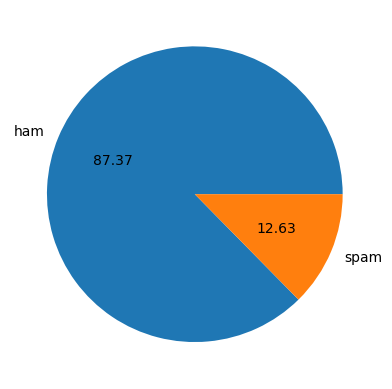

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct ="%0.2f")
plt.show()

#### Note:
  - It was clearly shown that, roughly 88% of the messages are not 'spam' and 12% os the sms were 'spam'
  
### key takeways from this point:
  - Data is imbalanced and keep this in mind and move furthur analysis.
  - Imbalance means 88% of the data is 'ham' and 12% is 'spam'

In [21]:
# Now I will find How many characters, words & sentences there in the 'text' column?
# on top of that I will create 3 new columns for deepre analysis.
# based on the no of characters, no of words & no of sentences we creat a 3 column respectively.

#### Note:
  - To do that, we need to import a library called 'nltk' which is a NLP libraray.

In [22]:
import nltk

In [23]:
nltk.download('punkt')   # which will ensure downloading the all the necessary dependency libraries get downloaded.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sivas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['text'].apply(len)  # Gives the no of characters from the text.

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [25]:
df['num_characters'] = df['text'].apply(len)   #added new column in the given dataframe

In [26]:
# no of words
df['text'].apply(lambda x:nltk.word_tokenize(x))        

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

#### Note: [nltk.word_tokenize() ]
  - nltk.word_tokenize --> will break the sentence into words in a list.
  - Now I have to count the words in the list by using len()

In [27]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


#### Note: [ nltk.sent_tokenize() ]
  

In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
# This is for all the text sms.

df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


#### Note:
  - If you observe, maximum no of characters in one sms is 910.0 and word count is 220 and sentence is 28. It was big sms.

In [33]:
# If we want to see only for 'ham' messages.

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
# for 'spam' messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

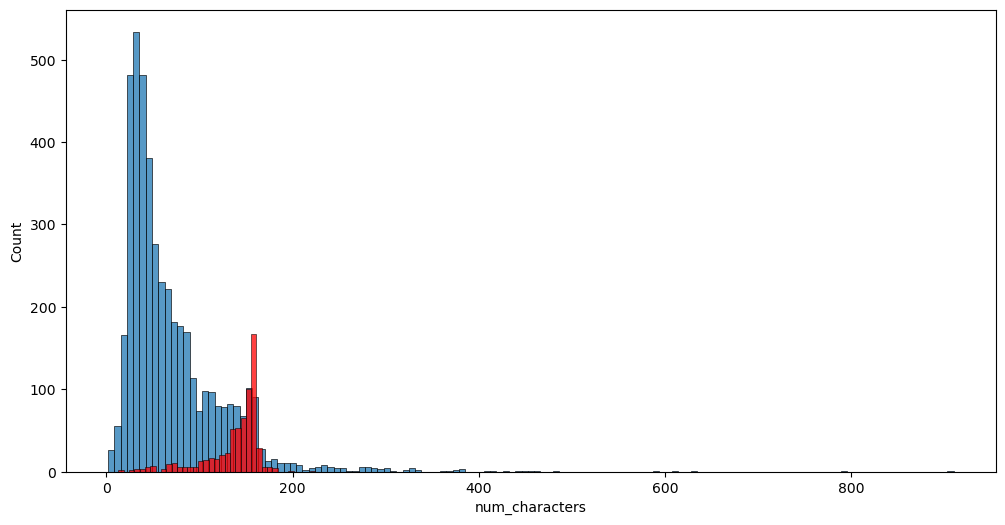

In [36]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

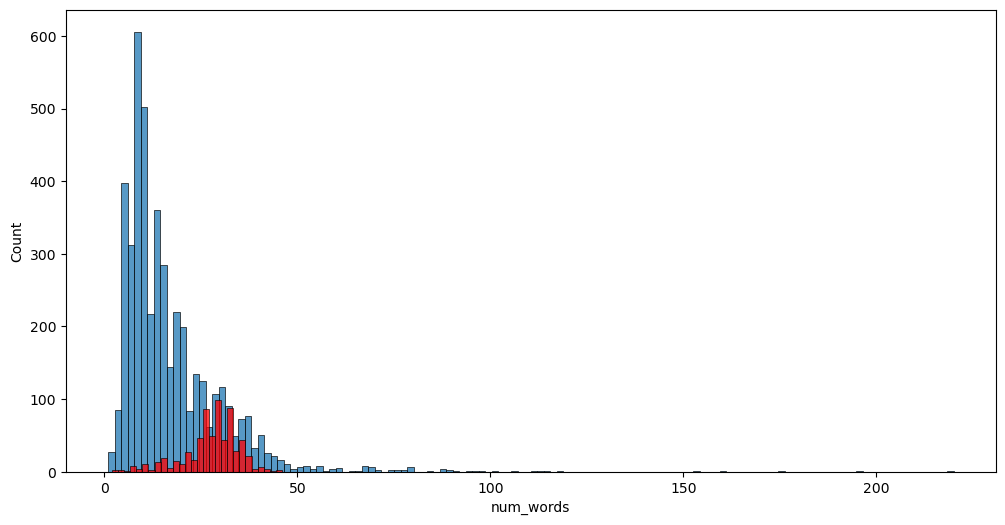

In [37]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

#### Key takeaway:
  - In 'ham' messages the average characters, words lesser than 'spam' messages.

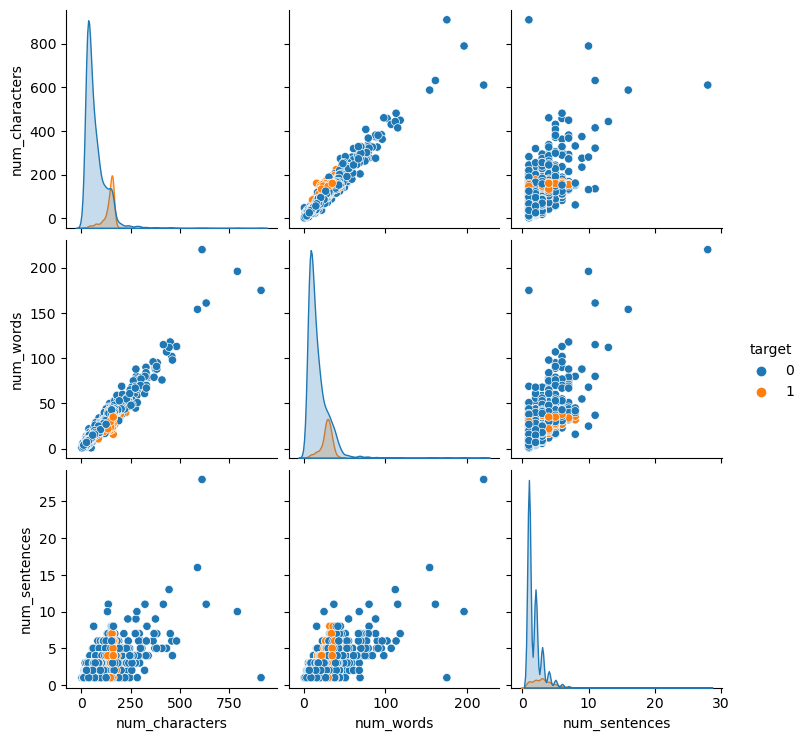

In [38]:
sns.pairplot(df, hue='target') # hue='target' means based on the target column color will be defined on scatterplot

#### Key findings
  - As number of characters increases, words increasing linearly.
  - Sentences is not not lenearly increses if we observe the way characters and words relationship does.
  - As we can observe, there were 'outliers' in the data. We can handle those at anyhow, otherwise outliers will derailed the analysis.

In [39]:
# Pearson correlation perform: to know (relationship) between the features
df.corr()

C:\Users\sivas\AppData\Local\Temp\ipykernel_26908\1927191761.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


C:\Users\sivas\AppData\Local\Temp\ipykernel_26908\1153639290.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

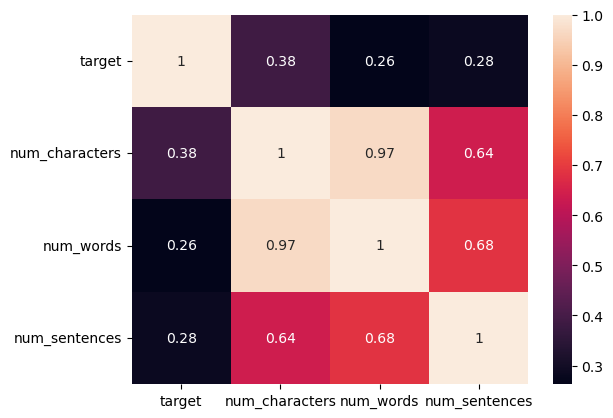

In [40]:
# To showcase the correlation, visualize through Heatmap

sns.heatmap(df.corr(), annot=True)

### Key takeaways:

  - Actually, there is a multi collinearity issue between the independent features.
  - usually, the correlation between independent variables is >= 0.7 we can conclude multicollinearity. no use of all the features.
  - Instead of using 'num_words' & 'num_sentences'. 'num_characters' is good to use since it has high correlation with 'target' variable compared to other features 'num_sentences' & 'num_words'.
  - For feature importance, it is strictly multi-collinearity took into consideration.

## 3. Text/Data Preprocessing

  - lower case
  - Tokenization
  - Removing special characters
  - Removing stop words and punctuations
  - Stemming

#### Note:
  - It is good to know what are top/frequent most words used in 'ham' and 'spam' messages respectively.

In [41]:
# I will create a function in such a way that all the preprocessing mentioned above solved in one go:

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)     # convert list to string whereas split is quite opposite.

In [42]:
# nltk used for tokenization(breakdown the sentence into words in list), stop words & stemming

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# These are the stopwords in general

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
# To check what are punctuations in general

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
# stemming (example)

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [46]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [47]:
# testing purpose of function working or not

transform_text('Hi How are you. Did you get 100 $ money for your caring.?')

'hi get 100 money care'

### Adding new column

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word cloud visualization

  - To visualize the most frequent words in 'spam' and in 'ham'

In [50]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

#### Spam Word cloud

In [52]:
# Concatenating all the rows data

df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

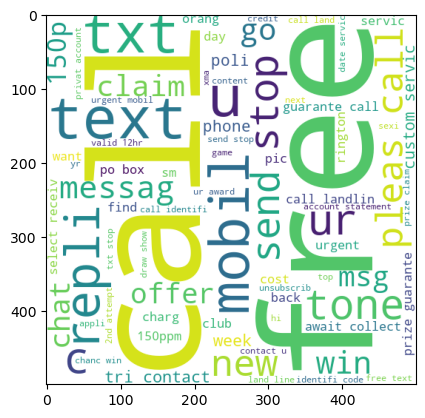

In [54]:
plt.imshow(spam_wc)

#### ham Word cloud

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

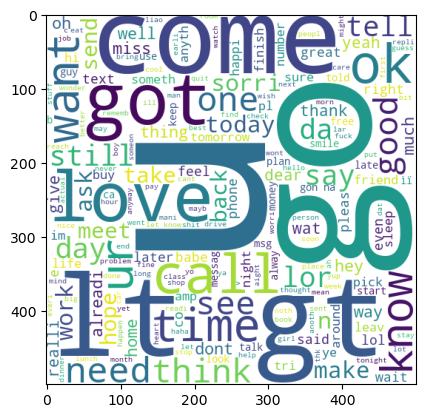

In [56]:
plt.imshow(ham_wc)

#### Top 30 frequent words used in 'ham' & 'spam'

In [57]:
# Spam 30 words

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

9939

In [59]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [60]:
# Most common 30 words

Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [61]:
# same top words we converted into dataframe.
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


#### Note:

  - Just visualize these words so that in a way that easily understandable.

In [62]:
# I am getting error

In [63]:
# ham top 30 words

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [64]:
pd.DataFrame(Counter(ham_corpus).most_common(30)).head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


## 4. Model Building

  - In our case, firstly I go with Naive baye's and later we also try other models and comparing between these models which one gives better results. 
  - Here, why I am choosing Naive Baye's model and why not other models: The reason is as simple as it is actually Naive Baye's performs well on textual data However, other models also performs best but In this case we go with Naive baye's first.

### Note:

   - When we buld Machine learning model, It is always common sense that input values given to Machine learning model is in the form of "numerical values".
   - Our case, The input values feed to the ML model is "transformed_text" which was in "textual data".
   - We need to change into numerical by means of vectorization.
   - Whereas, target feature is "target" and it values was in "numerical data" so no need to change as such.
#### Vectorization (Convert text --> Numeric). There are many techniques under vectorization out of which we are using "Bag of words"

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [93]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [94]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
X.shape

(5169, 3000)

#### Note:
  - 5169 is the 'sms'
  - 6708 is the 'words'

In [96]:
y = df['target'].values

In [97]:
y

array([0, 0, 1, ..., 0, 0, 0])

#### Note:
  - Since, 'target' feature has in numeric data we do not need to transform into numeric

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [100]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [101]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [102]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


### Keytake aways:
  - Since we have 3 sub models under Naive Baye's:
  1. Gaussian Naive Baye's
  2. Multinomial Naive Baye's
  3. Bernoulli Naive Baye's
  - From the Gaussian NB --> 88% accuracy model predicts.
  - Whereas, Precision score --> 53% which was not good

In [103]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


### Keytake aways:
  - Since we have 3 sub models under Naive Baye's:
  1. Gaussian Naive Baye's
  2. Multinomial Naive Baye's
  - From the Multinomial NB --> 96% accuracy model predicts.
  - Whereas, Precision score --> 83% which was not good

In [104]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Keytake aways:
  - Since we have 3 sub models under Naive Baye's:
  - Out of all 3 sub models, Bernoulli Naive Baye's gives best results.
  - From the Baye's NB --> 97% accuracy model predicts.
  - Whereas, Precision score --> 97% which was not good

### Note:
  - For Imbalanced data, Precision matter's a lot when compared to accuracy.
  - precision is more reliable metric than accuracy when data was Imbalanced

### Note2:
  - I applied CounteVectorizerwhich is a "Bag of words" techniques under vectorization.
  - Other than "Bag of words" we have couple of other techniques which was "tfidf Vectorizer" and let give a try with this technique and check whether there was changes in the results.

#### Vectorization (Convert text --> Numeric). There are many techniques under vectorization out of which we are using "tfidf vectorizer"

### Note:
  - Nothing changes I couldn't find in GaussianNB by using "tfidf Vectorizer"

In [106]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y2_pred))
print(confusion_matrix(y_test,y2_pred))
print(precision_score(y_test,y2_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


### Note:
  - Precision was 100% acheived in MultinomialNB by using "tfidf Vectorizer" since I am more concerned about precision than accuracy

#### Note
  - Note I chose Multinomial Naive Baye's provided that "tfidf vectorization" since it fetched 100% precision among 3 different models

## Next step:
  - Now what I will do is, I will try few other ML models on this data and compare with MultinomialNB results

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [108]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [109]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [110]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [111]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [112]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuarcy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuarcy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuarcy -  0.9052224371373307
Precision -  1.0
For NB
Accuarcy -  0.9709864603481625
Precision -  1.0
For DT
Accuarcy -  0.9294003868471954
Precision -  0.8282828282828283
For LR
Accuarcy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuarcy -  0.9748549323017408
Precision -  0.9827586206896551
For AdaBoost
Accuarcy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuarcy -  0.9574468085106383
Precision -  0.8671875
For ETC
Accuarcy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuarcy -  0.9477756286266924
Precision -  0.92
For xgb
Accuarcy -  0.9661508704061895
Precision -  0.9256198347107438


In [113]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores}).sort_values(by='precision', ascending=False)

In [114]:
performance_df

,Algorithm,Accuracy,precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [115]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [116]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.966151
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


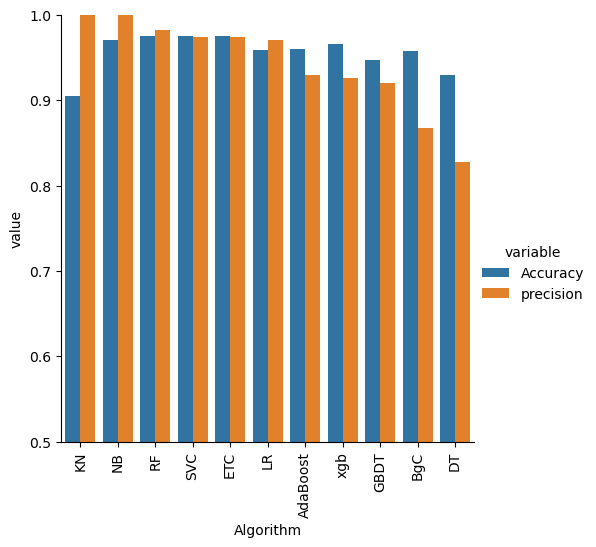

In [117]:
sns.catplot(x = 'Algorithm', y = 'value',
                 hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement/Evaluation:
## 1st Improvement (Features_restricted)
  - 1. change the max_features parameter of TfIdf
  - 2. Actaully when we tried with TfIdf vectorizer to convert textual data into numerical, by default we considered all the 
features but there is one hidden parameter with named as "max_features"
  - 3. It means basically when we vectorize the text data into numerical data, we do not define how many frequent words take into 
  - 4. consideration. By using "max_feature"we can say 3000, it means only top 3000 words will be consider into analysis.
  - 5. Let's see whether it impart any changes in the output

In [118]:
# model improve
# 1. change the max_features parameter of TfIdf

In [119]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values(by='Precision_max_ft_3000', ascending=False)

In [120]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [122]:
new_df

,Algorithm,Accuracy,precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,xgb,0.966151,0.925620,0.966151,0.925620
8,GBDT,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188


### Note:
  - Naive Bayes fetched resultes in a way we wanted. Slightly accuracy increased and precision was maintained exactly same.

## 2nd Improvemnt (Scaling)
  - This time we will try to improve even bit more by using scaling.
  - Actually we transformed the text into numerical by using TfIdf vectorizer and all are into vectroized into numbers.
  - We don't know somewhere numerical values will be there other than 0 and 1's.
  - By doing scaling so that every numerical values will in the same range from 0 to 1
  
### let's try this to improve. We don't know whether it imparts good results or not

In [123]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(max_features = 3000)

In [124]:
#X2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [125]:
#X2

#### Note:
  - The reason why I am using MinMaxScaler but not StandardScalar for normalization because standardscaler gives negaitive values since Naive Baye's doesn't give fair output if there is a negative values.

In [126]:
# Scaling apply
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X2 = scaler.fit_transform(X2)

In [127]:
#X2 = np.hstack((X2, df['num_characters'].values.reshape(-1,1)))

In [128]:
#X2.shape

In [129]:
#y = df['target'].values   # values convert into numpy array

In [130]:
#y

In [131]:
#from sklearn.model_selection import train_test_split
#X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size=0.2,random_state=2)

In [132]:
#from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [133]:
#gnb.fit(X2_train,y_train)
#y3_pred = gnb.predict(X2_test)
#print(accuracy_score(y_test,y3_pred))
#print(confusion_matrix(y_test,y3_pred))
#print(precision_score(y_test,y3_pred))

In [134]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [135]:
#svc = SVC(kernel='sigmoid', gamma=1.0)
#knc = KNeighborsClassifier()
#mnb = MultinomialNB()
#dtc = DecisionTreeClassifier(max_depth=5)
#lrc = LogisticRegression(solver='liblinear', penalty='l1')
#rfc = RandomForestClassifier(n_estimators=50,random_state=2)
#abc = AdaBoostClassifier(n_estimators=50,random_state=2)
#bc = BaggingClassifier(n_estimators=50,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
#gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
#clfs = {
    #'SVC' : svc,
    #'KN' : knc,
    #'NB' : mnb,
    #'DT' : dtc,
    #'LR' : lrc,
    #'RF' : rfc,
    #'AdaBoost' : abc,
    #'BgC' : bc,
    #'ETC' : etc,
    #'GBDT' : gbdt,
    #'xgb' : xgb
#}

In [139]:
#def transform_class_add_column(clf,X2_train,y_train,X2_test,y_test):
    #clf.fit(X2_train,y_train)
    #y_pred1 = clf.predict(X2_test)
    #accuracy_addcol = accuracy_score(y_test,y_pred1)
    #precision_addcol = precision_score(y_test,y_pred1)
    
    #return accuracy_addcol,precision_addcol


In [140]:
#transform_class_add_column(svc,X2_train,y_train,X2_test,y_test)

In [141]:
#accuracy_scores_newcol = []
#precision_scores_newcol = []

#for x,i in clfs.items():
    #curr_accuracy_scale,curr_precision_scale = transform_class_add_column(i,X2_train,y_train,X2_test,y_test)
    
   # print("For", x)
   # print("Accuracy score -", curr_accuracy_scale)
   # print("Precision score -", curr_precision_scale)
    
   # accuracy_scores_newcol.append(curr_accuracy_scale)
   # precision_scores_newcol.append(curr_precision_scale)
    

In [142]:
#addnewcol_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores_newcol,'Precision_num_chars':precision_scores_newcol}).sort_values(by='Precision_num_chars',ascending=False)

In [143]:
#addnewcol_df

In [144]:
#new_df_newcol = new_df.merge(addnewcol_df,on='Algorithm')

In [145]:
#new_df_newcol

### Note:
  - Scaling doesn't fetch any good results rather it decreases the performance of the model.
  - Although accuracy has increased but my main metric was "precision" since it was dropped down than before.
  - So, I decided "Scaling" will remove from the workflow since it doesn't now impart good results

## 3.Improvement(Added extra column as Input)
  - If we remember, we added 3 column intially based on "transformed_text" out of which the one so called "num_characters". If I feed this column as Input to the model in addition to the "transformed_text" column.
  - Let's see what gonna be the results will fetch. Will it yeild good performance or not.

In [146]:
#new_df_newcol

### Note:
  - Actually I had tried scaling but the output results were not so expected then I omitted the scaling results.
  - Now, I tried with adding extra feature as Input to the model and here was the results as shown above.
  - See especially Naive Bayes model the precision has again rose to 100% but it is quite disappointed with accuracy results.
  - Whereas, after done with scaling the both precision and accuracy was too bad.

## Note:
  - All in all, the best results, model fetched after considered 3000 words in the process of converting text data into numerical by means of TfIdf vectorizer.
  - But anyway I am gonna give a try 2 more ways to improve my model to boost precision.

## 4. Voting Classifier (Combination of best performing models)
  - This voting classifier is nothing but combining the different models altogether and give the results with an intent to increase the results than best outperformed model.
  - In some cases, It might perform out perform or some times not.
  - My goal is Precision would be maintained 100% as it was but additionally I need to increase the accuracy > 97.09%
  - let's give a try

In [147]:
# voting classifier (combing models like svc,mnb,extratreesclassifier)
#svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
#mnb = MultinomialNB()
#etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)


In [148]:
#from sklearn.ensemble import VotingClassifier

In [149]:
#voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting = 'soft')

In [150]:
#voting.fit(X2_train,y_train)

In [151]:
#y_pred2 = voting.predict(X2_test)
#print("Accuracy", accuracy_score(y_test,y_pred2))
#print("Precision", precision_score(y_test,y_pred2))

### Note:
  - Again I was quite disappoint with accuracy. It was even lower than before no matter though precision was good.
  - Voting ensemble was also not helping me to boost the model.
  - I would have tried other models if I work in the real company, but to keep this simple I quit here itself with VotingClassifier (Just to know the flavour of Voting Classifier what is all about)

## 5. StackingClassifier (Combination of best performing models)
  - Stacking is similar to VotingClassifier in a way ensembling the models altogether but the subtle difference would be weightage would be assigned to the models based on the final_estimator.

In [152]:
#estimators = [('svm', svc), ('mnb', mnb), ('et', etc)]
#final_estimator=RandomForestClassifier()

In [153]:
#from sklearn.ensemble import StackingClassifier

In [154]:
#clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [155]:
#clf.fit(X2_train,y_train)
#y_pred3 = clf.predict(X2_test)
#print("Accuracy:- ", accuracy_score(y_test,y_pred3))
#print("Precision:- ",precision_score(y_test,y_pred3))

#### Note:
  - Despite Accuracy increased, precision dropped down.
  - I will stop my analysis by here

## Note:
  - Now, we will build the pipeline of the project and conver that into website.
  - Let's understand what to do in sequential order when the new email comes what to do first.
  - First preprocess - Transform that text message into "lemitization, top words, removing stop words etc.,
  - Secondly - we do with transformed text is "vectorization"
  - Thirdly - Apply model on the data.
  - And for that matter, I import 2 pickle files just to make it import into website.
  - We pickle the file whichever the model you have decided to apply on your coming new data based on the results you actua;;y satisfied.

In [156]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))    # to convert the text into vectors
pickle.dump(mnb,open('model.pkl', 'wb'))